In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model , regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

### Data load
#### Data description: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/wine.csv'
df = pd.read_csv(url, header=None)

### Data shuffling and sampling

In [3]:
df = df.sample(frac=1.0,random_state=2)
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


### Model structure: Basline model

In [4]:
def WineModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu')(Inp)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Output = Dense(1, activation='sigmoid')(Hidden3)

    return Model(Inp, Output)


### Experiment setting

In [5]:
Npatience = 20
Nepochs = 300
Nbatch = 250

### Model save directory setting

In [6]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)


### Model training

In [7]:
ModelSaveSameName = save_path+'WineM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)
EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience)


Wine = WineModel()
Wine.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

HistWine = Wine.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs, batch_size=Nbatch,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/300
21/21 [==============================] - 2s 70ms/step - loss: 1.1293 - accuracy: 0.7542 - val_loss: 0.4496 - val_accuracy: 0.8054

Epoch 00001: val_loss improved from inf to 0.44956, saving model to ./Results\WineM.hdf5
Epoch 2/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.8545 - val_loss: 0.2741 - val_accuracy: 0.9092

Epoch 00002: val_loss improved from 0.44956 to 0.27410, saving model to ./Results\WineM.hdf5
Epoch 3/300
21/21 [==============================] - 0s 4ms/step - loss: 0.2633 - accuracy: 0.9141 - val_loss: 0.2403 - val_accuracy: 0.9200

Epoch 00003: val_loss improved from 0.27410 to 0.24034, saving model to ./Results\WineM.hdf5
Epoch 4/300
21/21 [==============================] - 0s 4ms/step - loss: 0.2107 - accuracy: 0.9298 - val_loss: 0.2282 - val_accuracy: 0.9177

Epoch 00004: val_loss improved from 0.24034 to 0.22821, saving model to ./Results\WineM.hdf5
Epoch 5/300
21/21 [==============================] - 0s 4ms/ste

### Plot loss graphs

Text(0, 0.5, 'loss')

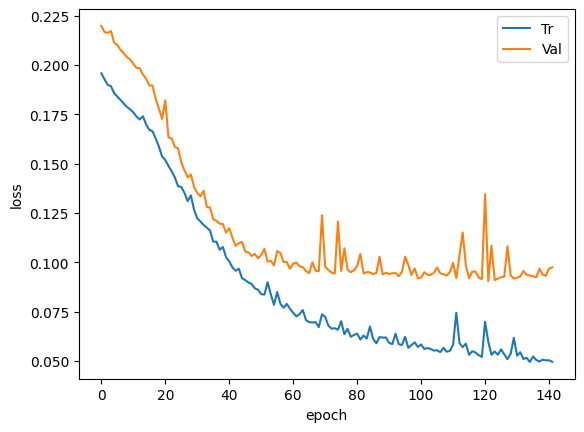

In [8]:
StartIDX = 5
plt.plot(HistWine.history['loss'][StartIDX:], label='Tr')
plt.plot(HistWine.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Model structure: L1 model

In [9]:
L1 = regularizers.L1(l1=0.005)

def WineL1Model ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu',kernel_regularizer=L1,bias_regularizer=L1)(Inp)
    Hidden2 = Dense(12, activation='relu',kernel_regularizer=L1,bias_regularizer=L1)(Hidden1)
    Hidden3 = Dense(8, activation='relu',kernel_regularizer=L1,bias_regularizer=L1)(Hidden2)
    Output = Dense(1, activation='sigmoid',kernel_regularizer=L1,bias_regularizer=L1)(Hidden3)

    return Model(Inp, Output)

### Model training

In [10]:
ModelSaveSameName = save_path+'WineL1.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience )

WineL1 = WineL1Model()
WineL1.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

HistWineL1 = WineL1.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs , batch_size=Nbatch ,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/300
21/21 [==============================] - 0s 10ms/step - loss: 1.5833 - accuracy: 0.7778 - val_loss: 1.1307 - val_accuracy: 0.8208

Epoch 00001: val_loss improved from inf to 1.13073, saving model to ./Results\WineL1.hdf5
Epoch 2/300
21/21 [==============================] - 0s 5ms/step - loss: 1.0981 - accuracy: 0.8514 - val_loss: 1.0348 - val_accuracy: 0.8715

Epoch 00002: val_loss improved from 1.13073 to 1.03483, saving model to ./Results\WineL1.hdf5
Epoch 3/300
21/21 [==============================] - 0s 5ms/step - loss: 0.9913 - accuracy: 0.8931 - val_loss: 0.9339 - val_accuracy: 0.9138

Epoch 00003: val_loss improved from 1.03483 to 0.93391, saving model to ./Results\WineL1.hdf5
Epoch 4/300
21/21 [==============================] - 0s 5ms/step - loss: 0.8945 - accuracy: 0.9285 - val_loss: 0.8545 - val_accuracy: 0.9215

Epoch 00004: val_loss improved from 0.93391 to 0.85449, saving model to ./Results\WineL1.hdf5
Epoch 5/300
21/21 [==============================] - 0s 5ms

### Plot loss graphs

Text(0, 0.5, 'loss')

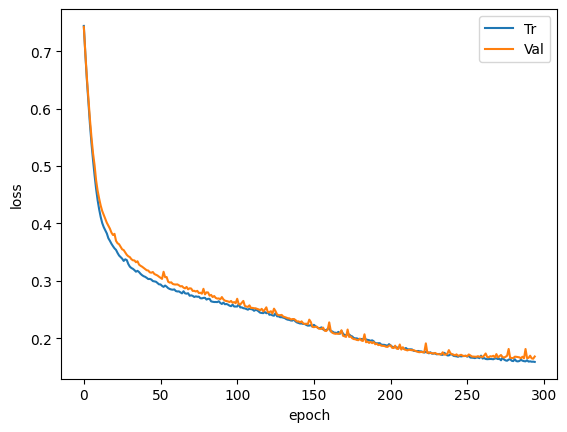

In [11]:
StartIDX = 5
plt.plot(HistWineL1.history['loss'][StartIDX:], label='Tr')
plt.plot(HistWineL1.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Model structure: L2 model

In [12]:
L2 = regularizers.L2(l2=0.005)


def WineL2Model ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu',kernel_regularizer=L2,bias_regularizer=L2)(Inp)
    Hidden2 = Dense(12, activation='relu',kernel_regularizer=L2,bias_regularizer=L2)(Hidden1)
    Hidden3 = Dense(8, activation='relu',kernel_regularizer=L2,bias_regularizer=L2)(Hidden2)
    Output = Dense(1, activation='sigmoid',kernel_regularizer=L2,bias_regularizer=L2)(Hidden3)

    return Model(Inp, Output)

### Model training

In [13]:
ModelSaveSameName = save_path+'WineL2.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience )

WineL2 = WineL2Model()
WineL2.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

HistWineL2 = WineL2.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs , batch_size=Nbatch ,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/300
21/21 [==============================] - 0s 9ms/step - loss: 7.3214 - accuracy: 0.3099 - val_loss: 1.0708 - val_accuracy: 0.7446

Epoch 00001: val_loss improved from inf to 1.07076, saving model to ./Results\WineL2.hdf5
Epoch 2/300
21/21 [==============================] - 0s 5ms/step - loss: 1.0713 - accuracy: 0.7521 - val_loss: 0.8547 - val_accuracy: 0.7823

Epoch 00002: val_loss improved from 1.07076 to 0.85468, saving model to ./Results\WineL2.hdf5
Epoch 3/300
21/21 [==============================] - 0s 5ms/step - loss: 0.6754 - accuracy: 0.8305 - val_loss: 0.4996 - val_accuracy: 0.8954

Epoch 00003: val_loss improved from 0.85468 to 0.49964, saving model to ./Results\WineL2.hdf5
Epoch 4/300
21/21 [==============================] - 0s 5ms/step - loss: 0.4474 - accuracy: 0.9004 - val_loss: 0.4374 - val_accuracy: 0.9046

Epoch 00004: val_loss improved from 0.49964 to 0.43740, saving model to ./Results\WineL2.hdf5
Epoch 5/300
21/21 [==============================] - 0s 5ms/

### Plot loss graphs

Text(0, 0.5, 'loss')

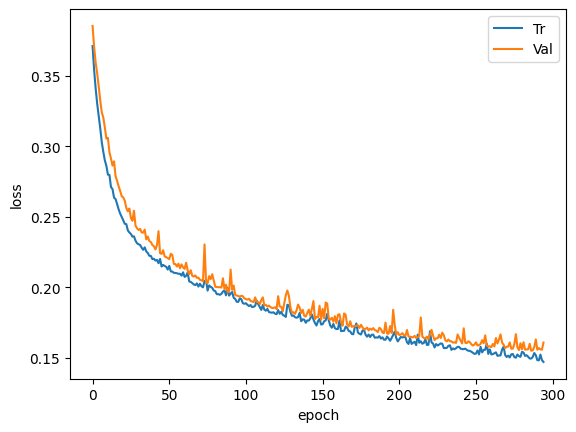

In [14]:
StartIDX = 5
plt.plot(HistWineL2.history['loss'][StartIDX:], label='Tr')
plt.plot(HistWineL2.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Model structure: L1L2 model

In [15]:
L1L2 = regularizers.L1L2(l1=0.001, l2=0.001)


def WineL1L2Model ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu',kernel_regularizer=L1L2,bias_regularizer=L1L2)(Inp)
    Hidden2 = Dense(12, activation='relu',kernel_regularizer=L1L2,bias_regularizer=L1L2)(Hidden1)
    Hidden3 = Dense(8, activation='relu',kernel_regularizer=L1L2,bias_regularizer=L1L2)(Hidden2)
    Output = Dense(1, activation='sigmoid',kernel_regularizer=L1L2,bias_regularizer=L1L2)(Hidden3)

    return Model(Inp, Output)

In [16]:
ModelSaveSameName = save_path+'WineL1L2.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience )

WineL1L2 = WineL1L2Model()
WineL1L2.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

HistWineL1L2 = WineL1L2.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs , batch_size=Nbatch ,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/300
21/21 [==============================] - 1s 11ms/step - loss: 2.2648 - accuracy: 0.7531 - val_loss: 0.8728 - val_accuracy: 0.7454

Epoch 00001: val_loss improved from inf to 0.87275, saving model to ./Results\WineL1L2.hdf5
Epoch 2/300
21/21 [==============================] - 0s 6ms/step - loss: 0.6724 - accuracy: 0.7525 - val_loss: 0.5544 - val_accuracy: 0.7531

Epoch 00002: val_loss improved from 0.87275 to 0.55440, saving model to ./Results\WineL1L2.hdf5
Epoch 3/300
21/21 [==============================] - 0s 6ms/step - loss: 0.5173 - accuracy: 0.7711 - val_loss: 0.5239 - val_accuracy: 0.8292

Epoch 00003: val_loss improved from 0.55440 to 0.52391, saving model to ./Results\WineL1L2.hdf5
Epoch 4/300
21/21 [==============================] - 0s 6ms/step - loss: 0.4918 - accuracy: 0.8714 - val_loss: 0.4973 - val_accuracy: 0.8908

Epoch 00004: val_loss improved from 0.52391 to 0.49731, saving model to ./Results\WineL1L2.hdf5
Epoch 5/300
21/21 [==============================] 

### Accuracy difference between regularized and unregularized models

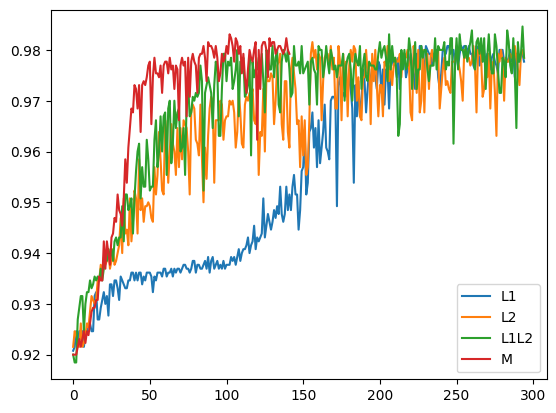

In [17]:
plt.plot(HistWineL1.history['val_accuracy'][StartIDX:],  label='L1')
plt.plot(HistWineL2.history['val_accuracy'][StartIDX:],  label='L2')
plt.plot(HistWineL1L2.history['val_accuracy'][StartIDX:],  label='L1L2')

plt.plot(HistWine.history['val_accuracy'][StartIDX:],  label='M')
plt.legend()

### Coefficient magnitude comparison

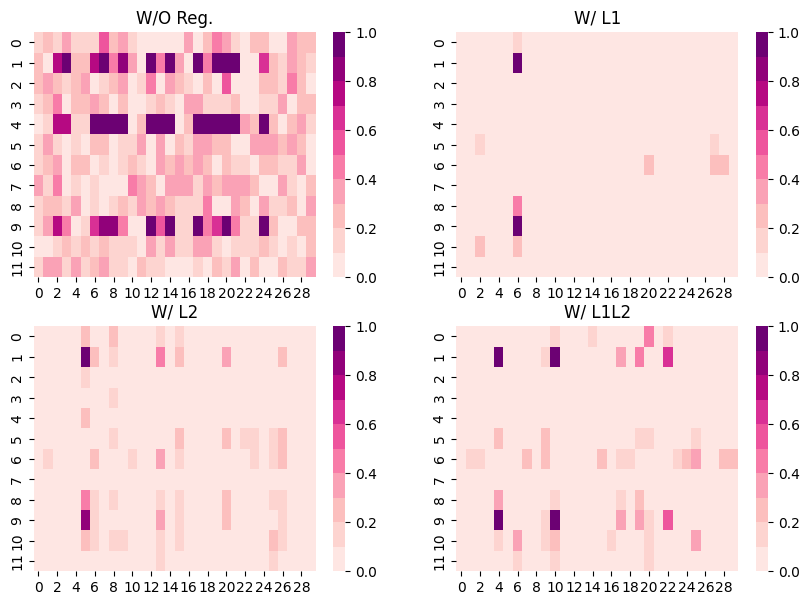

In [18]:
ModelList = [Wine, WineL1, WineL2, WineL1L2]
TitleList = ['W/O Reg.','W/ L1','W/ L2', 'W/ L1L2' ]
CoeffIDX= 0

plt.figure(figsize=(10,7))
for num, model in enumerate(ModelList):
    plt.subplot(2,2,num+1)
    sns.heatmap(np.abs(model.weights[CoeffIDX]), cmap=sns.color_palette("RdPu", 10), vmin=0, vmax=1., cbar=True)
    plt.title(TitleList[num])
    
